In [1]:
#cite : data from https://www.kaggle.com/skihikingkevin/pubg-match-deaths
#cite: map from Blue Hole a PUBG company
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.misc.pilutil import imread
import matplotlib.cm as cm
import time

In [ ]:
#my spec to analze this : 8700k @5ghz  16g ram @3200mhz

In [2]:
#import data
start = time.time()
deaths1 = pd.read_csv("deaths/kill_match_stats_final_0.csv") #2g each 
deaths2 = pd.read_csv("deaths/kill_match_stats_final_1.csv")
#deaths3 = pd.read_csv("deaths/kill_match_stats_final_2.csv") # for larger base data analze
#deaths4 = pd.read_csv("deaths/kill_match_stats_final_3.csv")
deaths = pd.concat([deaths1, deaths2])
#deaths = pd.concat([deaths1, deaths2,deaths3, deaths4]) 
end = time.time()
print("load complete", end -start)
# 47s to load 1 file 
#97s to load 2 files

load complete 91.36265397071838


C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


plt time for miramar 45.3806312084198


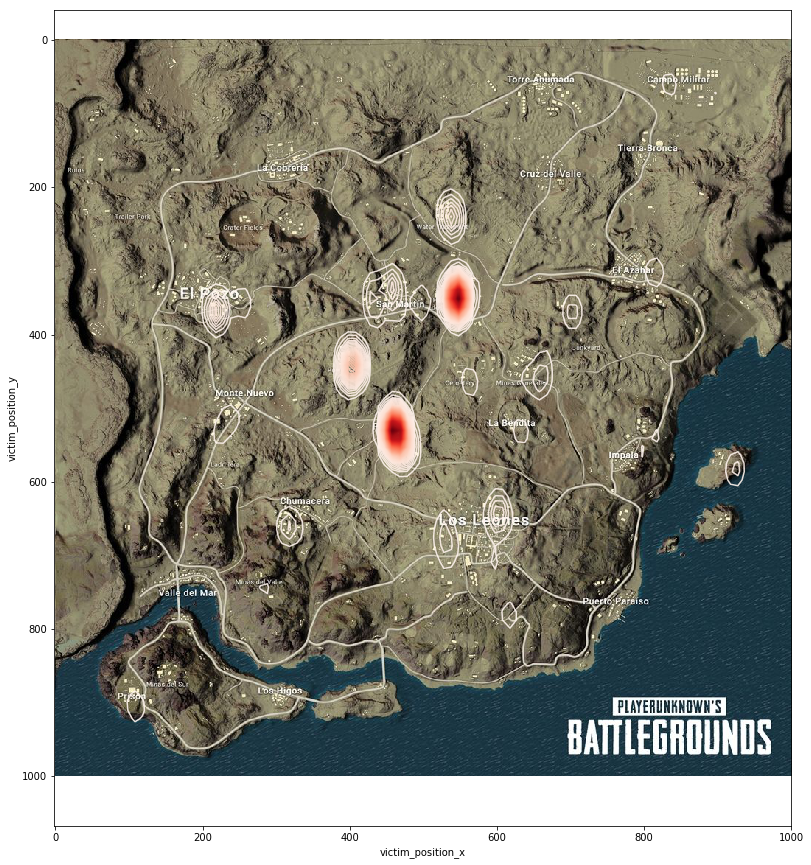

In [4]:
miramar = deaths[deaths["map"] == "MIRAMAR"]
erangel = deaths[deaths["map"] == "ERANGEL"]

# heatmap for death take placed in the first 2 mins
start = time.time()
position_data = ["killer_position_x","killer_position_y","victim_position_x","victim_position_y"]
for position in position_data:#filter
    miramar[position] = miramar[position].apply(lambda x: x*1000/800000) #map image res: 1000 x 1000
    miramar = miramar[miramar[position] != 0]

    erangel[position] = erangel[position].apply(lambda x: x*4096/800000)#both are 8km x 8km map map image res: 4096x 4096
    erangel = erangel[erangel[position] != 0]

n = 50000   #sample number
#filter by time
miramar_sample = miramar[miramar["time"] < 120].sample(n)
erangel_sample = erangel[erangel["time"] < 120].sample(n)

# map: miramar
bg = imread("miramar.jpg")#background
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(bg)#show background
sns.kdeplot(miramar_sample["victim_position_x"], miramar_sample["victim_position_y"],n_levels=100, cmap=cm.Reds, alpha=0.9)#print heat map of the death take placed in the frist 2 mins
end = time.time()
print("plt time for miramar", end -start)
#expect 50secs

C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


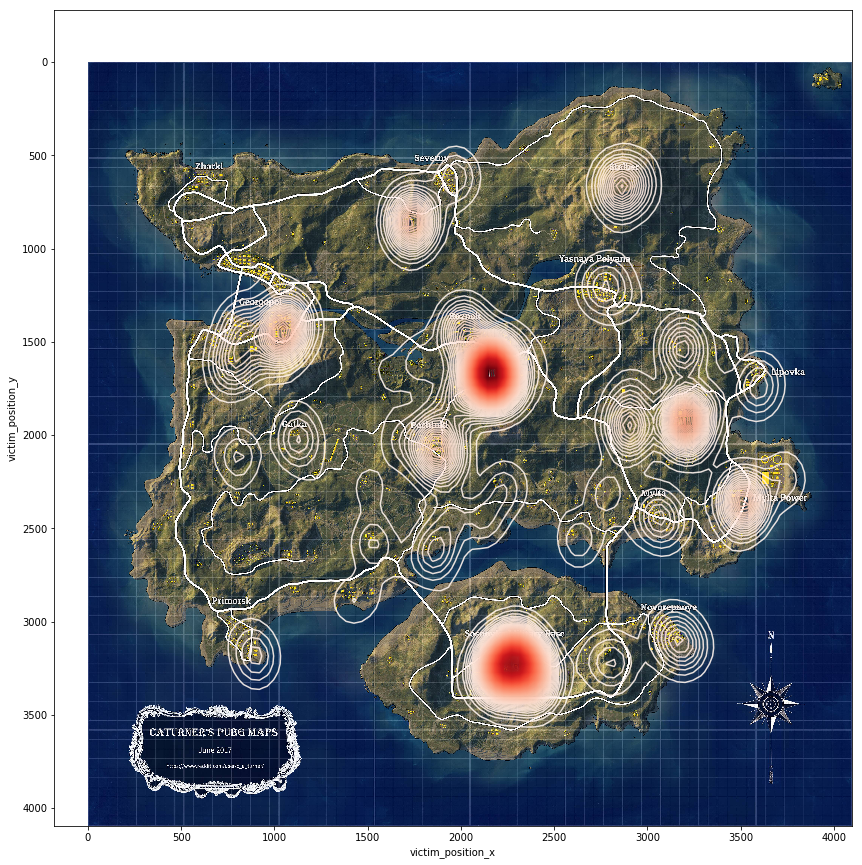

In [5]:
# map: erangel
bg = imread("erangel.jpg") #read map
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(bg) #back ground
sns.kdeplot(erangel_sample["victim_position_x"], erangel_sample["victim_position_y"], n_levels=100,cmap=cm.Reds, alpha=0.9) #print heat map of the death take placed in the frist 2 mins

C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Text(0.5, 1.0, 'Map erangel final Zone Heatmap ')

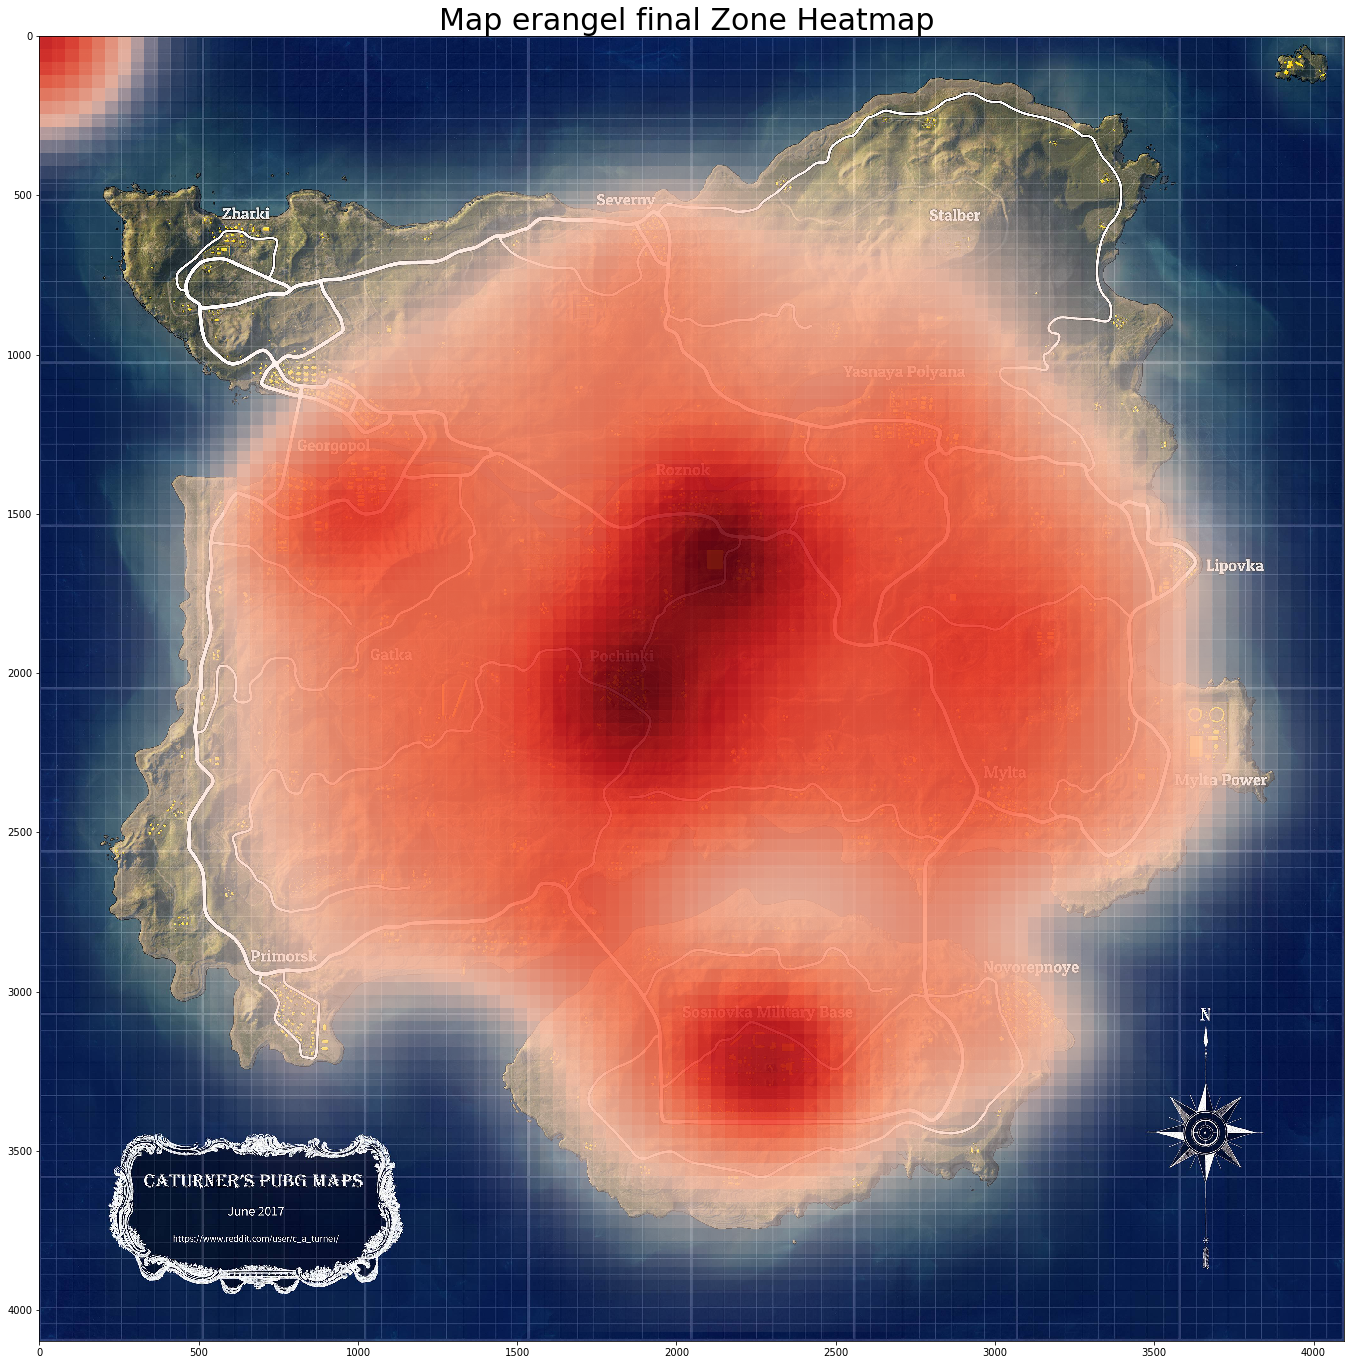

In [6]:
#deaths1 = pd.read_csv("deaths/kill_match_stats_final_0.csv")
#deaths2 = pd.read_csv("deaths/kill_match_stats_final_1.csv")
from scipy.ndimage.filters import gaussian_filter # gauss filter
from matplotlib.colors import Normalize
death = pd.concat([deaths1, deaths2]) # using 2 set for saving time

last_seconds_erg = death.loc[(death['map'] == 'ERANGEL') & (death['killer_placement'] == 1), :].dropna()# find the victim killed by the winner
last_seconds_mrm = death.loc[(death['map'] == 'MIRAMAR') & (death['killer_placement'] == 1), :].dropna()#as the winner placement is 1st
data_erg = last_seconds_erg[['victim_position_x', 'victim_position_y']].values
data_mrm = last_seconds_mrm[['victim_position_x', 'victim_position_y']].values
data_erg = data_erg * 4096 / 800000
data_mrm = data_mrm * 1000 / 800000

def heatmap(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s) #Gauss filter 

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

bg = imread("erangel.jpg") #backgroud
hmap, extent = heatmap(data_erg[:, 0], data_erg[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)     
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Reds(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(24, 24))
ax.set_xlim(0, 4096) #4096x4096
ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()
plt.savefig('out3.png', dpi=100)
plt.title("Map erangel final Zone Heatmap ",fontsize=30)


C:\Users\cuz_7\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


Text(0.5, 1.0, 'Map miramar final Zone Heatmap ')

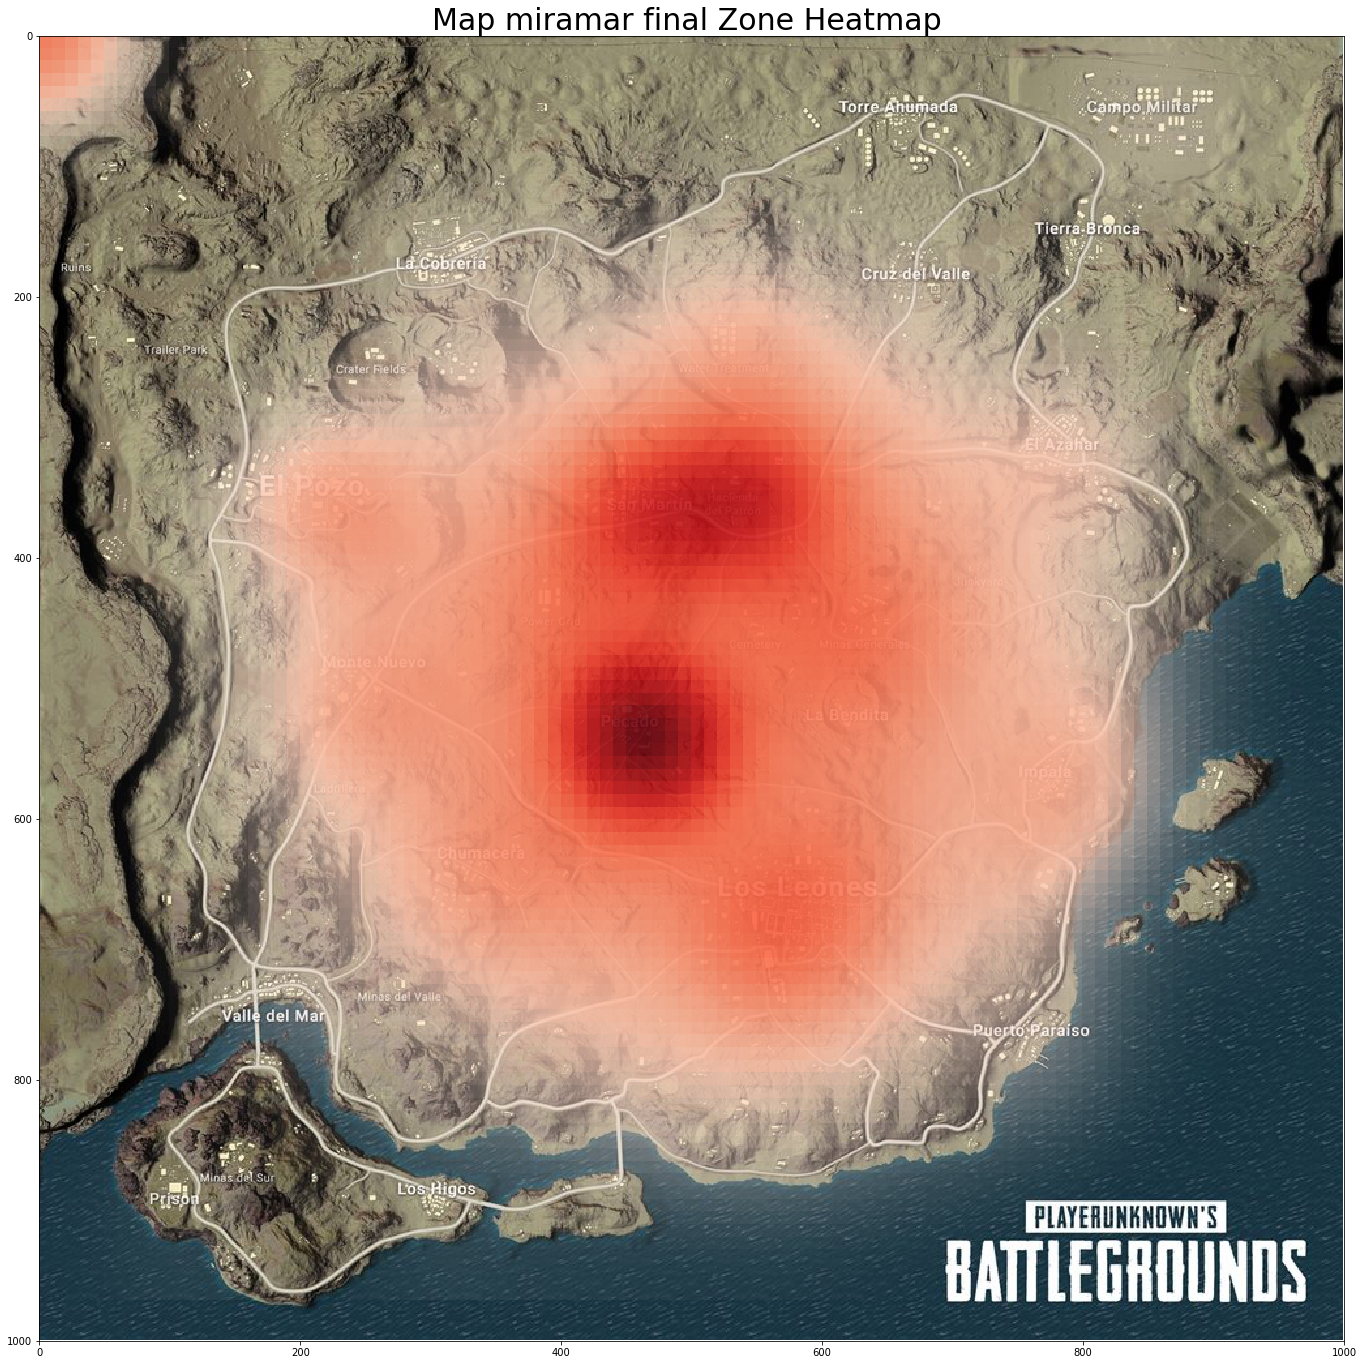

In [7]:
last_seconds_mrm = death.loc[(death['map'] == 'MIRAMAR') & (death['killer_placement'] == 1), :].dropna()# find the victim killed by the winner
data_erg = last_seconds_erg[['victim_position_x', 'victim_position_y']].values
data_mrm = last_seconds_mrm[['victim_position_x', 'victim_position_y']].values
data_erg = data_erg * 4096 / 800000
data_mrm = data_mrm * 1000 / 800000

bg = imread("miramar.jpg") 
hmap, extent = heatmap(data_mrm[:, 0], data_mrm[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Reds(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(24, 24))
ax.set_xlim(0, 1000);
ax.set_ylim(0, 1000)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis() #obtain ax
plt.savefig('out4.png', dpi=100) # plot the heat map
plt.title("Map miramar final Zone Heatmap ",fontsize=30)

Text(0.5, 1.0, 'Kill distribution by Distance under 1000m')

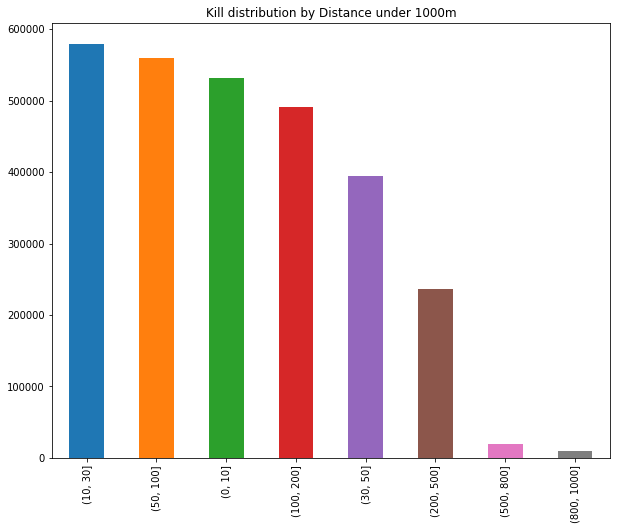

In [8]:
#kill distribution by distance

death = pd.concat([deaths1, deaths2])
last_seconds_erg = death.loc[(death['killer_placement'] == 1), :].dropna() #filter those victim not killed by others(in data set death postion 0 , 0)

distance = np.sqrt(((last_seconds_erg['killer_position_x'] - last_seconds_erg['victim_position_x']) / 100) ** 2 + (
        (last_seconds_erg['killer_position_y'] - last_seconds_erg['victim_position_y']) / 100) ** 2) # calculate the distance by victim's postion and the killer position
distance = distance.apply(lambda x: int(x)) # d = sqrt((x1-x2)^2+ (y1-y2)^2)

labels = [0, 10, 30, 50, 100, 200, 500, 800, 1000] # bin size distance above 1000m are rarely happend 
distan_cut = pd.cut(distance, bins=labels) #bin the kills by distance 0, 10, 30, 50, 100, 200, 500, 800, 1000
distan_cut.value_counts().plot.bar(figsize=(10, 8))
plt.savefig('out6.png', dpi=100)
plt.title("Kill distribution by Distance under 1000m")